In [1]:
%matplotlib inline


# Artist tutorial


Using Artist objects to render on the canvas.

There are three layers to the matplotlib API.

* the :class:`matplotlib.backend_bases.FigureCanvas` is the area onto which
  the figure is drawn
* the :class:`matplotlib.backend_bases.Renderer` is
  the object which knows how to draw on the
  :class:`~matplotlib.backend_bases.FigureCanvas`
* and the :class:`matplotlib.artist.Artist` is the object that knows how to use
  a renderer to paint onto the canvas.

The :class:`~matplotlib.backend_bases.FigureCanvas` and
:class:`~matplotlib.backend_bases.Renderer` handle all the details of
talking to user interface toolkits like `wxPython
<https://www.wxpython.org>`_ or drawing languages like PostScript®, and
the ``Artist`` handles all the high level constructs like representing
and laying out the figure, text, and lines.  The typical user will
spend 95% of their time working with the ``Artists``.

There are two types of ``Artists``: primitives and containers.  The primitives
represent the standard graphical objects we want to paint onto our canvas:
:class:`~matplotlib.lines.Line2D`, :class:`~matplotlib.patches.Rectangle`,
:class:`~matplotlib.text.Text`, :class:`~matplotlib.image.AxesImage`, etc., and
the containers are places to put them (:class:`~matplotlib.axis.Axis`,
:class:`~matplotlib.axes.Axes` and :class:`~matplotlib.figure.Figure`).  The
standard use is to create a :class:`~matplotlib.figure.Figure` instance, use
the ``Figure`` to create one or more :class:`~matplotlib.axes.Axes` or
:class:`~matplotlib.axes.Subplot` instances, and use the ``Axes`` instance
helper methods to create the primitives.  In the example below, we create a
``Figure`` instance using :func:`matplotlib.pyplot.figure`, which is a
convenience method for instantiating ``Figure`` instances and connecting them
with your user interface or drawing toolkit ``FigureCanvas``.  As we will
discuss below, this is not necessary -- you can work directly with PostScript,
PDF Gtk+, or wxPython ``FigureCanvas`` instances, instantiate your ``Figures``
directly and connect them yourselves -- but since we are focusing here on the
``Artist`` API we'll let :mod:`~matplotlib.pyplot` handle some of those details
for us::

    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

The :class:`~matplotlib.axes.Axes` is probably the most important
class in the matplotlib API, and the one you will be working with most
of the time.  This is because the ``Axes`` is the plotting area into
which most of the objects go, and the ``Axes`` has many special helper
methods (:meth:`~matplotlib.axes.Axes.plot`,
:meth:`~matplotlib.axes.Axes.text`,
:meth:`~matplotlib.axes.Axes.hist`,
:meth:`~matplotlib.axes.Axes.imshow`) to create the most common
graphics primitives (:class:`~matplotlib.lines.Line2D`,
:class:`~matplotlib.text.Text`,
:class:`~matplotlib.patches.Rectangle`,
:class:`~matplotlib.image.Image`, respectively).  These helper methods
will take your data (e.g., ``numpy`` arrays and strings) and create
primitive ``Artist`` instances as needed (e.g., ``Line2D``), add them to
the relevant containers, and draw them when requested.  Most of you
are probably familiar with the :class:`~matplotlib.axes.Subplot`,
which is just a special case of an ``Axes`` that lives on a regular
rows by columns grid of ``Subplot`` instances.  If you want to create
an ``Axes`` at an arbitrary location, simply use the
:meth:`~matplotlib.figure.Figure.add_axes` method which takes a list
of ``[left, bottom, width, height]`` values in 0-1 relative figure
coordinates::

    fig2 = plt.figure()
    ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

Continuing with our example::

    import numpy as np
    t = np.arange(0.0, 1.0, 0.01)
    s = np.sin(2*np.pi*t)
    line, = ax.plot(t, s, color='blue', lw=2)

In this example, ``ax`` is the ``Axes`` instance created by the
``fig.add_subplot`` call above (remember ``Subplot`` is just a
subclass of ``Axes``) and when you call ``ax.plot``, it creates a
``Line2D`` instance and adds it to the :attr:`Axes.lines
<matplotlib.axes.Axes.lines>` list.  In the interactive `ipython
<http://ipython.org/>`_ session below, you can see that the
``Axes.lines`` list is length one and contains the same line that was
returned by the ``line, = ax.plot...`` call:

.. sourcecode:: ipython

    In [101]: ax.lines[0]
    Out[101]: <matplotlib.lines.Line2D instance at 0x19a95710>

    In [102]: line
    Out[102]: <matplotlib.lines.Line2D instance at 0x19a95710>

If you make subsequent calls to ``ax.plot`` (and the hold state is "on"
which is the default) then additional lines will be added to the list.
You can remove lines later simply by calling the list methods; either
of these will work::

    del ax.lines[0]
    ax.lines.remove(line)  # one or the other, not both!

The Axes also has helper methods to configure and decorate the x-axis
and y-axis tick, tick labels and axis labels::

    xtext = ax.set_xlabel('my xdata') # returns a Text instance
    ytext = ax.set_ylabel('my ydata')

When you call :meth:`ax.set_xlabel <matplotlib.axes.Axes.set_xlabel>`,
it passes the information on the :class:`~matplotlib.text.Text`
instance of the :class:`~matplotlib.axis.XAxis`.  Each ``Axes``
instance contains an :class:`~matplotlib.axis.XAxis` and a
:class:`~matplotlib.axis.YAxis` instance, which handle the layout and
drawing of the ticks, tick labels and axis labels.

Try creating the figure below.



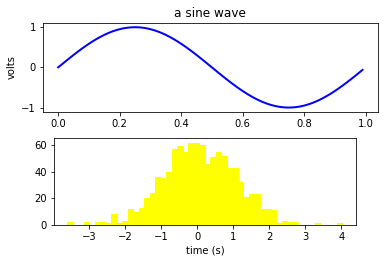

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('time (s)')

plt.show()


Customizing your objects
========================

Every element in the figure is represented by a matplotlib
:class:`~matplotlib.artist.Artist`, and each has an extensive list of
properties to configure its appearance.  The figure itself contains a
:class:`~matplotlib.patches.Rectangle` exactly the size of the figure,
which you can use to set the background color and transparency of the
figures.  Likewise, each :class:`~matplotlib.axes.Axes` bounding box
(the standard white box with black edges in the typical matplotlib
plot, has a ``Rectangle`` instance that determines the color,
transparency, and other properties of the Axes.  These instances are
stored as member variables :attr:`Figure.patch
<matplotlib.figure.Figure.patch>` and :attr:`Axes.patch
<matplotlib.axes.Axes.patch>` ("Patch" is a name inherited from
MATLAB, and is a 2D "patch" of color on the figure, e.g., rectangles,
circles and polygons).  Every matplotlib ``Artist`` has the following
properties

==========   ================================================================================
Property     Description
==========   ================================================================================
alpha        The transparency - a scalar from 0-1
animated     A boolean that is used to facilitate animated drawing
axes         The axes that the Artist lives in, possibly None
clip_box     The bounding box that clips the Artist
clip_on      Whether clipping is enabled
clip_path    The path the artist is clipped to
contains     A picking function to test whether the artist contains the pick point
figure       The figure instance the artist lives in, possibly None
label        A text label (e.g., for auto-labeling)
picker       A python object that controls object picking
transform    The transformation
visible      A boolean whether the artist should be drawn
zorder       A number which determines the drawing order
rasterized   Boolean; Turns vectors into raster graphics (for compression & eps transparency)
==========   ================================================================================

Each of the properties is accessed with an old-fashioned setter or
getter (yes we know this irritates Pythonistas and we plan to support
direct access via properties or traits but it hasn't been done yet).
For example, to multiply the current alpha by a half::

    a = o.get_alpha()
    o.set_alpha(0.5*a)

If you want to set a number of properties at once, you can also use
the ``set`` method with keyword arguments.  For example::

    o.set(alpha=0.5, zorder=2)

If you are working interactively at the python shell, a handy way to
inspect the ``Artist`` properties is to use the
:func:`matplotlib.artist.getp` function (simply
:func:`~matplotlib.pyplot.getp` in pyplot), which lists the properties
and their values.  This works for classes derived from ``Artist`` as
well, e.g., ``Figure`` and ``Rectangle``.  Here are the ``Figure`` rectangle
properties mentioned above:

.. sourcecode:: ipython

    In [149]: matplotlib.artist.getp(fig.patch)
	alpha = 1.0
	animated = False
	antialiased or aa = True
	axes = None
	clip_box = None
	clip_on = False
	clip_path = None
	contains = None
	edgecolor or ec = w
	facecolor or fc = 0.75
	figure = Figure(8.125x6.125)
	fill = 1
	hatch = None
	height = 1
	label =
	linewidth or lw = 1.0
	picker = None
	transform = <Affine object at 0x134cca84>
	verts = ((0, 0), (0, 1), (1, 1), (1, 0))
	visible = True
	width = 1
	window_extent = <Bbox object at 0x134acbcc>
	x = 0
	y = 0
	zorder = 1

The docstrings for all of the classes also contain the ``Artist``
properties, so you can consult the interactive "help" or the
`artist-api` for a listing of properties for a given object.


Object containers
=================


Now that we know how to inspect and set the properties of a given
object we want to configure, we need to know how to get at that object.
As mentioned in the introduction, there are two kinds of objects:
primitives and containers.  The primitives are usually the things you
want to configure (the font of a :class:`~matplotlib.text.Text`
instance, the width of a :class:`~matplotlib.lines.Line2D`) although
the containers also have some properties as well -- for example the
:class:`~matplotlib.axes.Axes` :class:`~matplotlib.artist.Artist` is a
container that contains many of the primitives in your plot, but it
also has properties like the ``xscale`` to control whether the xaxis
is 'linear' or 'log'.  In this section we'll review where the various
container objects store the ``Artists`` that you want to get at.


Figure container
----------------

The top level container ``Artist`` is the
:class:`matplotlib.figure.Figure`, and it contains everything in the
figure.  The background of the figure is a
:class:`~matplotlib.patches.Rectangle` which is stored in
:attr:`Figure.patch <matplotlib.figure.Figure.patch>`.  As
you add subplots (:meth:`~matplotlib.figure.Figure.add_subplot`) and
axes (:meth:`~matplotlib.figure.Figure.add_axes`) to the figure
these will be appended to the :attr:`Figure.axes
<matplotlib.figure.Figure.axes>`.  These are also returned by the
methods that create them:

.. sourcecode:: ipython

    In [156]: fig = plt.figure()

    In [157]: ax1 = fig.add_subplot(211)

    In [158]: ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])

    In [159]: ax1
    Out[159]: <matplotlib.axes.Subplot instance at 0xd54b26c>

    In [160]: print(fig.axes)
    [<matplotlib.axes.Subplot instance at 0xd54b26c>, <matplotlib.axes.Axes instance at 0xd3f0b2c>]

Because the figure maintains the concept of the "current axes" (see
:meth:`Figure.gca <matplotlib.figure.Figure.gca>` and
:meth:`Figure.sca <matplotlib.figure.Figure.sca>`) to support the
pylab/pyplot state machine, you should not insert or remove axes
directly from the axes list, but rather use the
:meth:`~matplotlib.figure.Figure.add_subplot` and
:meth:`~matplotlib.figure.Figure.add_axes` methods to insert, and the
:meth:`~matplotlib.figure.Figure.delaxes` method to delete.  You are
free however, to iterate over the list of axes or index into it to get
access to ``Axes`` instances you want to customize.  Here is an
example which turns all the axes grids on::

    for ax in fig.axes:
        ax.grid(True)


The figure also has its own text, lines, patches and images, which you
can use to add primitives directly.  The default coordinate system for
the ``Figure`` will simply be in pixels (which is not usually what you
want) but you can control this by setting the transform property of
the ``Artist`` you are adding to the figure.

.. TODO: Is that still true?

More useful is "figure coordinates" where (0, 0) is the bottom-left of
the figure and (1, 1) is the top-right of the figure which you can
obtain by setting the ``Artist`` transform to :attr:`fig.transFigure
<matplotlib.figure.Figure.transFigure>`:



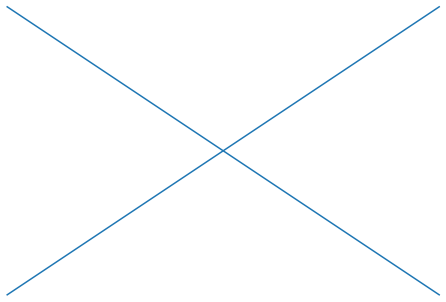

In [3]:
import matplotlib.lines as lines

fig = plt.figure()

l1 = lines.Line2D([0, 1], [0, 1], transform=fig.transFigure, figure=fig)
l2 = lines.Line2D([0, 1], [1, 0], transform=fig.transFigure, figure=fig)
fig.lines.extend([l1, l2])

plt.show()

Here is a summary of the Artists the figure contains

.. TODO: Add xrefs to this table

================ ===============================================================
Figure attribute Description
================ ===============================================================
axes             A list of Axes instances (includes Subplot)
patch            The Rectangle background
images           A list of FigureImages patches - useful for raw pixel display
legends          A list of Figure Legend instances (different from Axes.legends)
lines            A list of Figure Line2D instances (rarely used, see Axes.lines)
patches          A list of Figure patches (rarely used, see Axes.patches)
texts            A list Figure Text instances
================ ===============================================================


Axes container
--------------

The :class:`matplotlib.axes.Axes` is the center of the matplotlib
universe -- it contains the vast majority of all the ``Artists`` used
in a figure with many helper methods to create and add these
``Artists`` to itself, as well as helper methods to access and
customize the ``Artists`` it contains.  Like the
:class:`~matplotlib.figure.Figure`, it contains a
:class:`~matplotlib.patches.Patch`
:attr:`~matplotlib.axes.Axes.patch` which is a
:class:`~matplotlib.patches.Rectangle` for Cartesian coordinates and a
:class:`~matplotlib.patches.Circle` for polar coordinates; this patch
determines the shape, background and border of the plotting region::

    ax = fig.add_subplot(111)
    rect = ax.patch  # a Rectangle instance
    rect.set_facecolor('green')

When you call a plotting method, e.g., the canonical
:meth:`~matplotlib.axes.Axes.plot` and pass in arrays or lists of
values, the method will create a :meth:`matplotlib.lines.Line2D`
instance, update the line with all the ``Line2D`` properties passed as
keyword arguments, add the line to the :attr:`Axes.lines
<matplotlib.axes.Axes.lines>` container, and returns it to you:

.. sourcecode:: ipython

    In [213]: x, y = np.random.rand(2, 100)

    In [214]: line, = ax.plot(x, y, '-', color='blue', linewidth=2)

``plot`` returns a list of lines because you can pass in multiple x, y
pairs to plot, and we are unpacking the first element of the length
one list into the line variable.  The line has been added to the
``Axes.lines`` list:

.. sourcecode:: ipython

    In [229]: print(ax.lines)
    [<matplotlib.lines.Line2D instance at 0xd378b0c>]

Similarly, methods that create patches, like
:meth:`~matplotlib.axes.Axes.bar` creates a list of rectangles, will
add the patches to the :attr:`Axes.patches
<matplotlib.axes.Axes.patches>` list:

.. sourcecode:: ipython

    In [233]: n, bins, rectangles = ax.hist(np.random.randn(1000), 50, facecolor='yellow')

    In [234]: rectangles
    Out[234]: <a list of 50 Patch objects>

    In [235]: print(len(ax.patches))

You should not add objects directly to the ``Axes.lines`` or
``Axes.patches`` lists unless you know exactly what you are doing,
because the ``Axes`` needs to do a few things when it creates and adds
an object.  It sets the figure and axes property of the ``Artist``, as
well as the default ``Axes`` transformation (unless a transformation
is set).  It also inspects the data contained in the ``Artist`` to
update the data structures controlling auto-scaling, so that the view
limits can be adjusted to contain the plotted data.  You can,
nonetheless, create objects yourself and add them directly to the
``Axes`` using helper methods like
:meth:`~matplotlib.axes.Axes.add_line` and
:meth:`~matplotlib.axes.Axes.add_patch`.  Here is an annotated
interactive session illustrating what is going on:

.. sourcecode:: ipython

    In [262]: fig, ax = plt.subplots()

    # create a rectangle instance
    In [263]: rect = matplotlib.patches.Rectangle( (1,1), width=5, height=12)

    # by default the axes instance is None
    In [264]: print(rect.get_axes())
    None

    # and the transformation instance is set to the "identity transform"
    In [265]: print(rect.get_transform())
    <Affine object at 0x13695544>

    # now we add the Rectangle to the Axes
    In [266]: ax.add_patch(rect)

    # and notice that the ax.add_patch method has set the axes
    # instance
    In [267]: print(rect.get_axes())
    Axes(0.125,0.1;0.775x0.8)

    # and the transformation has been set too
    In [268]: print(rect.get_transform())
    <Affine object at 0x15009ca4>

    # the default axes transformation is ax.transData
    In [269]: print(ax.transData)
    <Affine object at 0x15009ca4>

    # notice that the xlimits of the Axes have not been changed
    In [270]: print(ax.get_xlim())
    (0.0, 1.0)

    # but the data limits have been updated to encompass the rectangle
    In [271]: print(ax.dataLim.bounds)
    (1.0, 1.0, 5.0, 12.0)

    # we can manually invoke the auto-scaling machinery
    In [272]: ax.autoscale_view()

    # and now the xlim are updated to encompass the rectangle
    In [273]: print(ax.get_xlim())
    (1.0, 6.0)

    # we have to manually force a figure draw
    In [274]: ax.figure.canvas.draw()


There are many, many ``Axes`` helper methods for creating primitive
``Artists`` and adding them to their respective containers.  The table
below summarizes a small sampling of them, the kinds of ``Artist`` they
create, and where they store them

==============================   ====================  =======================
Helper method                    Artist                Container
==============================   ====================  =======================
ax.annotate - text annotations   Annotate              ax.texts
ax.bar  - bar charts             Rectangle             ax.patches
ax.errorbar - error bar plots    Line2D and Rectangle  ax.lines and ax.patches
ax.fill - shared area            Polygon               ax.patches
ax.hist - histograms             Rectangle             ax.patches
ax.imshow - image data           AxesImage             ax.images
ax.legend - axes legends         Legend                ax.legends
ax.plot - xy plots               Line2D                ax.lines
ax.scatter - scatter charts      PolygonCollection     ax.collections
ax.text - text                   Text                  ax.texts
==============================   ====================  =======================


In addition to all of these ``Artists``, the ``Axes`` contains two
important ``Artist`` containers: the :class:`~matplotlib.axis.XAxis`
and :class:`~matplotlib.axis.YAxis`, which handle the drawing of the
ticks and labels.  These are stored as instance variables
:attr:`~matplotlib.axes.Axes.xaxis` and
:attr:`~matplotlib.axes.Axes.yaxis`.  The ``XAxis`` and ``YAxis``
containers will be detailed below, but note that the ``Axes`` contains
many helper methods which forward calls on to the
:class:`~matplotlib.axis.Axis` instances so you often do not need to
work with them directly unless you want to.  For example, you can set
the font color of the ``XAxis`` ticklabels using the ``Axes`` helper
method::

    for label in ax.get_xticklabels():
        label.set_color('orange')

Below is a summary of the Artists that the Axes contains

==============    ======================================
Axes attribute    Description
==============    ======================================
artists           A list of Artist instances
patch             Rectangle instance for Axes background
collections       A list of Collection instances
images            A list of AxesImage
legends           A list of Legend instances
lines             A list of Line2D instances
patches           A list of Patch instances
texts             A list of Text instances
xaxis             matplotlib.axis.XAxis instance
yaxis             matplotlib.axis.YAxis instance
==============    ======================================


Axis containers
---------------

The :class:`matplotlib.axis.Axis` instances handle the drawing of the
tick lines, the grid lines, the tick labels and the axis label.  You
can configure the left and right ticks separately for the y-axis, and
the upper and lower ticks separately for the x-axis.  The ``Axis``
also stores the data and view intervals used in auto-scaling, panning
and zooming, as well as the :class:`~matplotlib.ticker.Locator` and
:class:`~matplotlib.ticker.Formatter` instances which control where
the ticks are placed and how they are represented as strings.

Each ``Axis`` object contains a :attr:`~matplotlib.axis.Axis.label` attribute
(this is what :mod:`~matplotlib.pyplot` modifies in calls to
:func:`~matplotlib.pyplot.xlabel` and :func:`~matplotlib.pyplot.ylabel`) as
well as a list of major and minor ticks.  The ticks are
:class:`~matplotlib.axis.XTick` and :class:`~matplotlib.axis.YTick` instances,
which contain the actual line and text primitives that render the ticks and
ticklabels.  Because the ticks are dynamically created as needed (e.g., when
panning and zooming), you should access the lists of major and minor ticks
through their accessor methods :meth:`~matplotlib.axis.Axis.get_major_ticks`
and :meth:`~matplotlib.axis.Axis.get_minor_ticks`.  Although the ticks contain
all the primitives and will be covered below, ``Axis`` instances have accessor
methods that return the tick lines, tick labels, tick locations etc.:



array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

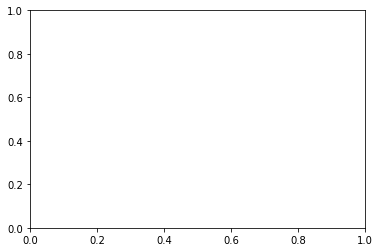

In [4]:
fig, ax = plt.subplots()
axis = ax.xaxis
axis.get_ticklocs()

In [5]:
axis.get_ticklabels()

<a list of 6 Text major ticklabel objects>

note there are twice as many ticklines as labels because by
 default there are tick lines at the top and bottom but only tick
 labels below the xaxis; this can be customized



In [6]:
axis.get_ticklines()

<a list of 12 Line2D ticklines objects>

by default you get the major ticks back



In [7]:
axis.get_ticklines()

<a list of 12 Line2D ticklines objects>

but you can also ask for the minor ticks



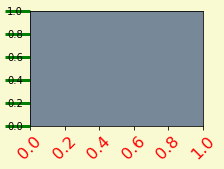

In [8]:
axis.get_ticklines(minor=True)

# Here is a summary of some of the useful accessor methods of the ``Axis``
# (these have corresponding setters where useful, such as
# set_major_formatter)
#
# ======================  =========================================================
# Accessor method         Description
# ======================  =========================================================
# get_scale               The scale of the axis, e.g., 'log' or 'linear'
# get_view_interval       The interval instance of the axis view limits
# get_data_interval       The interval instance of the axis data limits
# get_gridlines           A list of grid lines for the Axis
# get_label               The axis label - a Text instance
# get_ticklabels          A list of Text instances - keyword minor=True|False
# get_ticklines           A list of Line2D instances - keyword minor=True|False
# get_ticklocs            A list of Tick locations - keyword minor=True|False
# get_major_locator       The matplotlib.ticker.Locator instance for major ticks
# get_major_formatter     The matplotlib.ticker.Formatter instance for major ticks
# get_minor_locator       The matplotlib.ticker.Locator instance for minor ticks
# get_minor_formatter     The matplotlib.ticker.Formatter instance for minor ticks
# get_major_ticks         A list of Tick instances for major ticks
# get_minor_ticks         A list of Tick instances for minor ticks
# grid                    Turn the grid on or off for the major or minor ticks
# ======================  =========================================================
#
# Here is an example, not recommended for its beauty, which customizes
# the axes and tick properties

# plt.figure creates a matplotlib.figure.Figure instance
fig = plt.figure()
rect = fig.patch  # a rectangle instance
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4])
rect = ax1.patch
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('red')
    label.set_rotation(45)
    label.set_fontsize(16)

for line in ax1.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color('green')
    line.set_markersize(25)
    line.set_markeredgewidth(3)

plt.show()


Tick containers
---------------

The :class:`matplotlib.axis.Tick` is the final container object in our
descent from the :class:`~matplotlib.figure.Figure` to the
:class:`~matplotlib.axes.Axes` to the :class:`~matplotlib.axis.Axis`
to the :class:`~matplotlib.axis.Tick`.  The ``Tick`` contains the tick
and grid line instances, as well as the label instances for the upper
and lower ticks.  Each of these is accessible directly as an attribute
of the ``Tick``.

==============   ==========================================================
Tick attribute   Description
==============   ==========================================================
tick1line        Line2D instance
tick2line        Line2D instance
gridline         Line2D instance
label1           Text instance
label2           Text instance
==============   ==========================================================

Here is an example which sets the formatter for the right side ticks with
dollar signs and colors them green on the right side of the yaxis



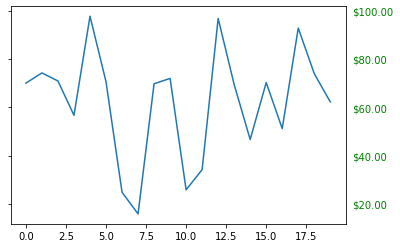

In [9]:
import matplotlib.ticker as ticker

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_visible(False)
    tick.label2.set_visible(True)
    tick.label2.set_color('green')

plt.show()